In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:
#dont use
def generate_bins(dataset, column):
    min_var = np.min(dataset[column])
    max_var = np.max(dataset[column])
    
    step_var = (max_var - min_var) / 10
    
    bins_array = np.array([])
    for x in range(1,11):
        bins_array = np.append(bins_array, min_var + (step*x))
    
    '''
    dataset["bins"] = dataset[column]
    for x in range(10):
        dataset.loc[dataset[column] <= bins_array[x], "bins"] = x
    '''
        
    dataset.loc[dataset[column] <= bins_array[0], "bins"] = 0
    dataset.loc[((dataset[column] <= bins_array[1]) & (dataset[column] > bins_array[0])), "bins"] = 1
    dataset.loc[((dataset[column] <= bins_array[2]) & (dataset[column] > bins_array[1])), "bins"] = 2
    dataset.loc[((dataset[column] <= bins_array[3]) & (dataset[column] > bins_array[2])), "bins"] = 3
    dataset.loc[((dataset[column] <= bins_array[4]) & (dataset[column] > bins_array[3])), "bins"] = 4
    dataset.loc[((dataset[column] <= bins_array[5]) & (dataset[column] > bins_array[4])), "bins"] = 5
    dataset.loc[((dataset[column] <= bins_array[6]) & (dataset[column] > bins_array[5])), "bins"] = 6
    dataset.loc[((dataset[column] <= bins_array[7]) & (dataset[column] > bins_array[6])), "bins"] = 7
    dataset.loc[((dataset[column] <= bins_array[8]) & (dataset[column] > bins_array[7])), "bins"] = 8
    dataset.loc[((dataset[column] <= bins_array[9]) & (dataset[column] > bins_array[8])), "bins"] = 9
        
    return

# Biodegredation

In [27]:
biodeg = pd.read_csv("biodeg_shuffled.csv")
biodeg.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,4.732,3.2710,1,0,1,0,2,42.9,0,0,...,2,2,2,3.903,2.431,1,8.466,0,1,NRB
1,5.074,2.2282,0,0,0,0,3,44.2,1,4,...,0,0,0,3.798,2.406,0,9.005,2,0,RB
2,4.562,3.2113,0,0,0,0,2,42.9,0,2,...,2,0,2,3.646,2.917,0,8.003,0,0,RB
3,4.380,3.3996,0,0,0,0,0,30.8,1,4,...,0,0,1,3.379,3.028,0,8.090,0,0,RB
4,5.489,1.8973,0,0,0,9,16,37.8,24,12,...,4,0,4,3.897,2.266,0,10.292,0,0,NRB


In [28]:
biodeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1055 non-null   float64
 1   1       1055 non-null   float64
 2   2       1055 non-null   int64  
 3   3       1055 non-null   int64  
 4   4       1055 non-null   int64  
 5   5       1055 non-null   int64  
 6   6       1055 non-null   int64  
 7   7       1055 non-null   float64
 8   8       1055 non-null   int64  
 9   9       1055 non-null   int64  
 10  10      1055 non-null   int64  
 11  11      1055 non-null   float64
 12  12      1055 non-null   float64
 13  13      1055 non-null   float64
 14  14      1055 non-null   float64
 15  15      1055 non-null   int64  
 16  16      1055 non-null   float64
 17  17      1055 non-null   float64
 18  18      1055 non-null   int64  
 19  19      1055 non-null   int64  
 20  20      1055 non-null   int64  
 21  21      1055 non-null   float64
 22  

In [29]:
biodeg.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


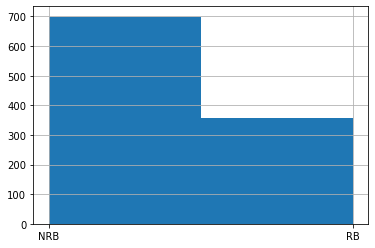

In [30]:
biodeg["41"].hist(bins=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022724EED940>,
      dtype=object)

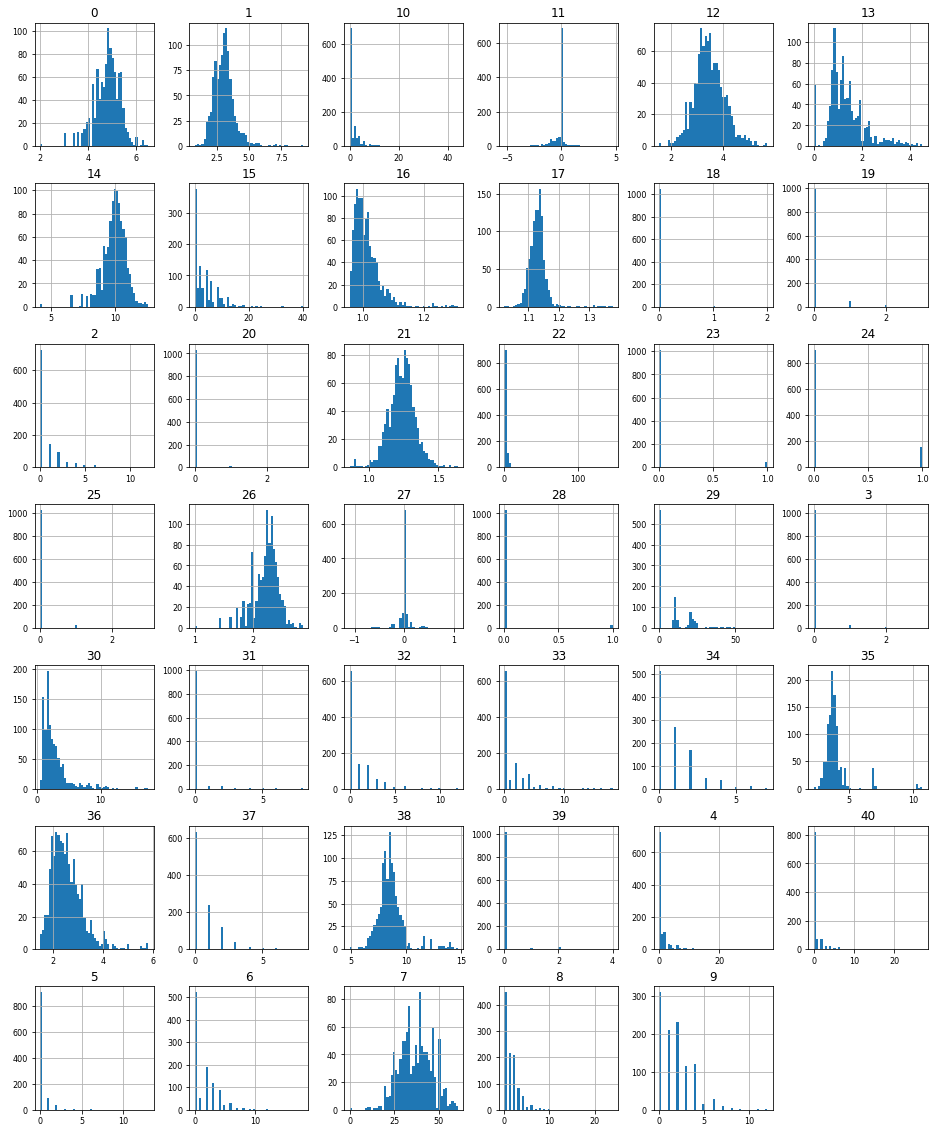

In [31]:
%matplotlib inline
biodeg.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [55]:
le = LabelEncoder()
biodeg["41"] = le.fit_transform(biodeg["41"])
biodeg.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,4.732,3.2710,1,0,1,0,2,42.9,0,0,...,2,2,2,3.903,2.431,1,8.466,0,1,0
1,5.074,2.2282,0,0,0,0,3,44.2,1,4,...,0,0,0,3.798,2.406,0,9.005,2,0,1
2,4.562,3.2113,0,0,0,0,2,42.9,0,2,...,2,0,2,3.646,2.917,0,8.003,0,0,1
3,4.380,3.3996,0,0,0,0,0,30.8,1,4,...,0,0,1,3.379,3.028,0,8.090,0,0,1
4,5.489,1.8973,0,0,0,9,16,37.8,24,12,...,4,0,4,3.897,2.266,0,10.292,0,0,0


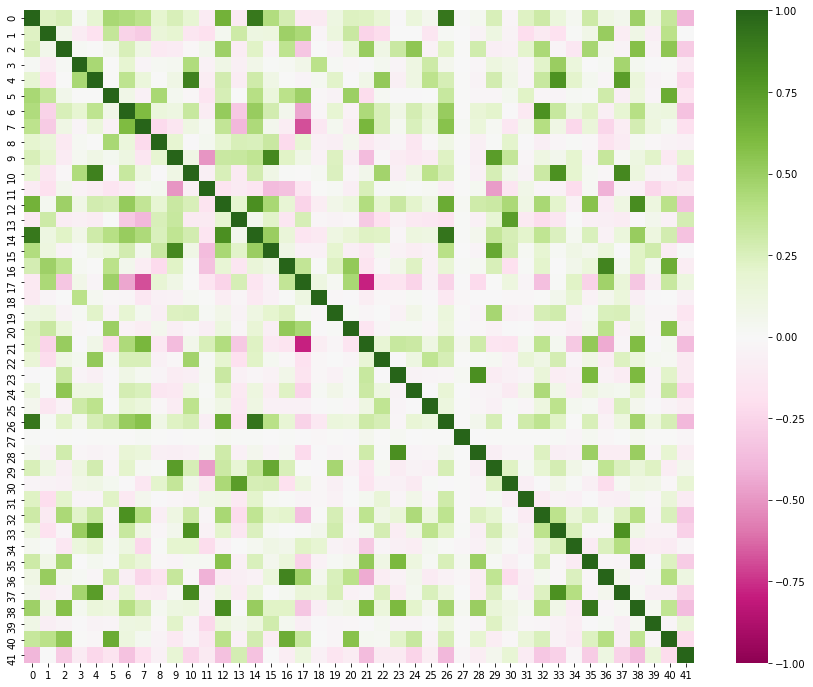

In [134]:
corr = biodeg.corr()

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax, vmin=-1, vmax=1, cmap="PiYG")

# Contraceptive

In [58]:
cmc = pd.read_csv("cmc_shuffled.csv")
cmc.head()

,0,1,2,3,4,5,6,7,8,9
0,34,2,3,2,1,1,2,3,0,3
1,28,1,1,3,1,1,3,1,0,1
2,45,1,2,1,1,0,3,3,0,1
3,26,3,3,3,1,1,3,3,0,3
4,30,2,2,6,1,0,2,3,0,3


In [59]:
cmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1473 non-null   int64
 1   1       1473 non-null   int64
 2   2       1473 non-null   int64
 3   3       1473 non-null   int64
 4   4       1473 non-null   int64
 5   5       1473 non-null   int64
 6   6       1473 non-null   int64
 7   7       1473 non-null   int64
 8   8       1473 non-null   int64
 9   9       1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [60]:
cmc.describe()

,0,1,2,3,4,5,6,7,8,9
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


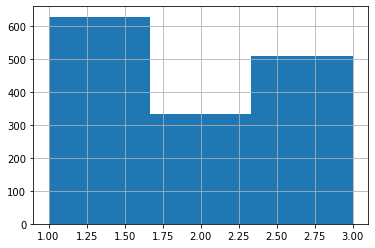

In [62]:
cmc["9"].hist(bins=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227367604A8>,
      dtype=object)

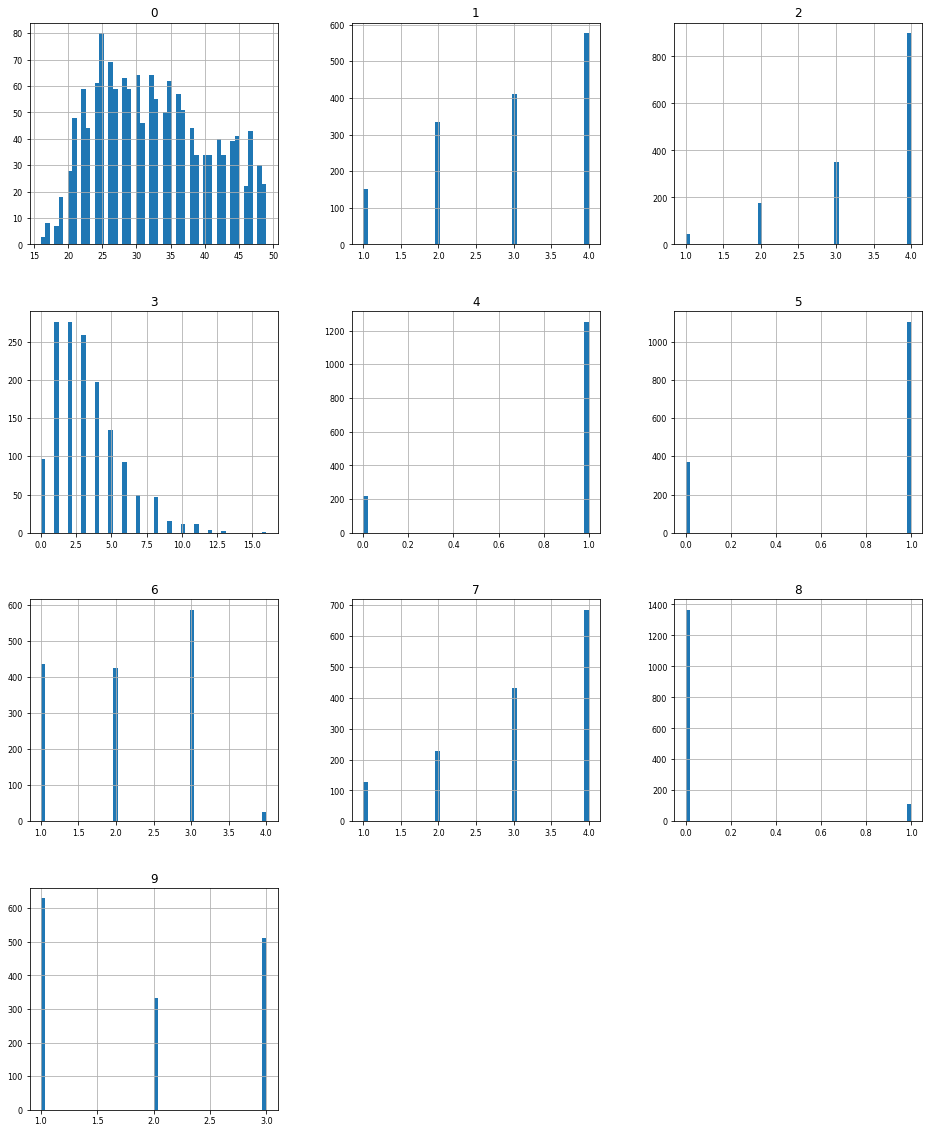

In [115]:
%matplotlib inline
cmc.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Need to one-hot encode

In [138]:
class_one_hot = pd.get_dummies(cmc["9"], prefix="class")
cmc_one_hot = pd.concat([cmc, class_one_hot], axis=1)
cmc_one_hot = cmc_one_hot.drop(["9"], axis=1)
cmc_one_hot.head()

,0,1,2,3,4,5,6,7,8,class_1,class_2,class_3
0,34,2,3,2,1,1,2,3,0,0,0,1
1,28,1,1,3,1,1,3,1,0,1,0,0
2,45,1,2,1,1,0,3,3,0,1,0,0
3,26,3,3,3,1,1,3,3,0,0,0,1
4,30,2,2,6,1,0,2,3,0,0,0,1


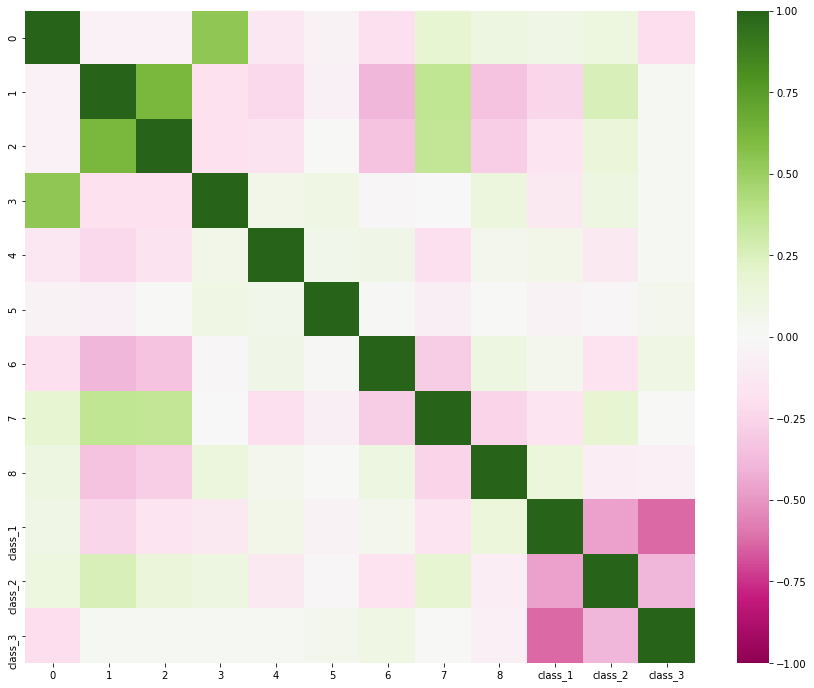

In [140]:
corr = cmc_one_hot.corr()

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax, vmin=-1, vmax=1, cmap="PiYG")

# Soybean

In [73]:
soybean = pd.read_csv("soybean_shuffled.csv", header=0)
soybean["0"] = le.fit_transform(soybean["0"])
soybean.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,15,2,1,2,2,?,1,1,?,?,...,0,0,?,?,?,?,?,?,?,1
1,15,1,1,2,1,1,3,1,2,0,...,0,0,3,4,0,0,0,0,0,0
2,12,5,1,2,1,0,3,3,0,1,...,0,0,0,0,0,0,0,0,0,0
3,15,2,1,2,0,0,1,1,2,0,...,0,0,3,4,0,0,0,0,0,0
4,5,2,0,2,1,0,3,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
soybean = soybean.apply(pd.to_numeric, errors='coerce')
soybean.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,15,2.0,1.0,2.0,2.0,NaN,1.0,1.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,15,1.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,0.0,...,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,5.0,1.0,2.0,1.0,0.0,3.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,...,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2.0,0.0,2.0,1.0,0.0,3.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
soybean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       307 non-null    int32  
 1   1       306 non-null    float64
 2   2       299 non-null    float64
 3   3       296 non-null    float64
 4   4       300 non-null    float64
 5   5       266 non-null    float64
 6   6       306 non-null    float64
 7   7       306 non-null    float64
 8   8       266 non-null    float64
 9   9       266 non-null    float64
 10  10      271 non-null    float64
 11  11      306 non-null    float64
 12  12      307 non-null    int64  
 13  13      282 non-null    float64
 14  14      282 non-null    float64
 15  15      282 non-null    float64
 16  16      281 non-null    float64
 17  17      282 non-null    float64
 18  18      277 non-null    float64
 19  19      306 non-null    float64
 20  20      266 non-null    float64
 21  21      296 non-null    float64
 22  22

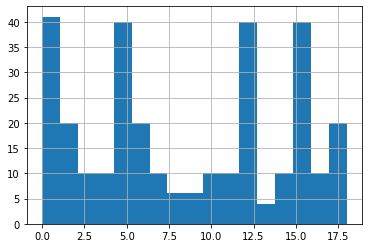

In [163]:
soybean["0"].hist(bins=17)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022739EA6278>,
      dtype=object)

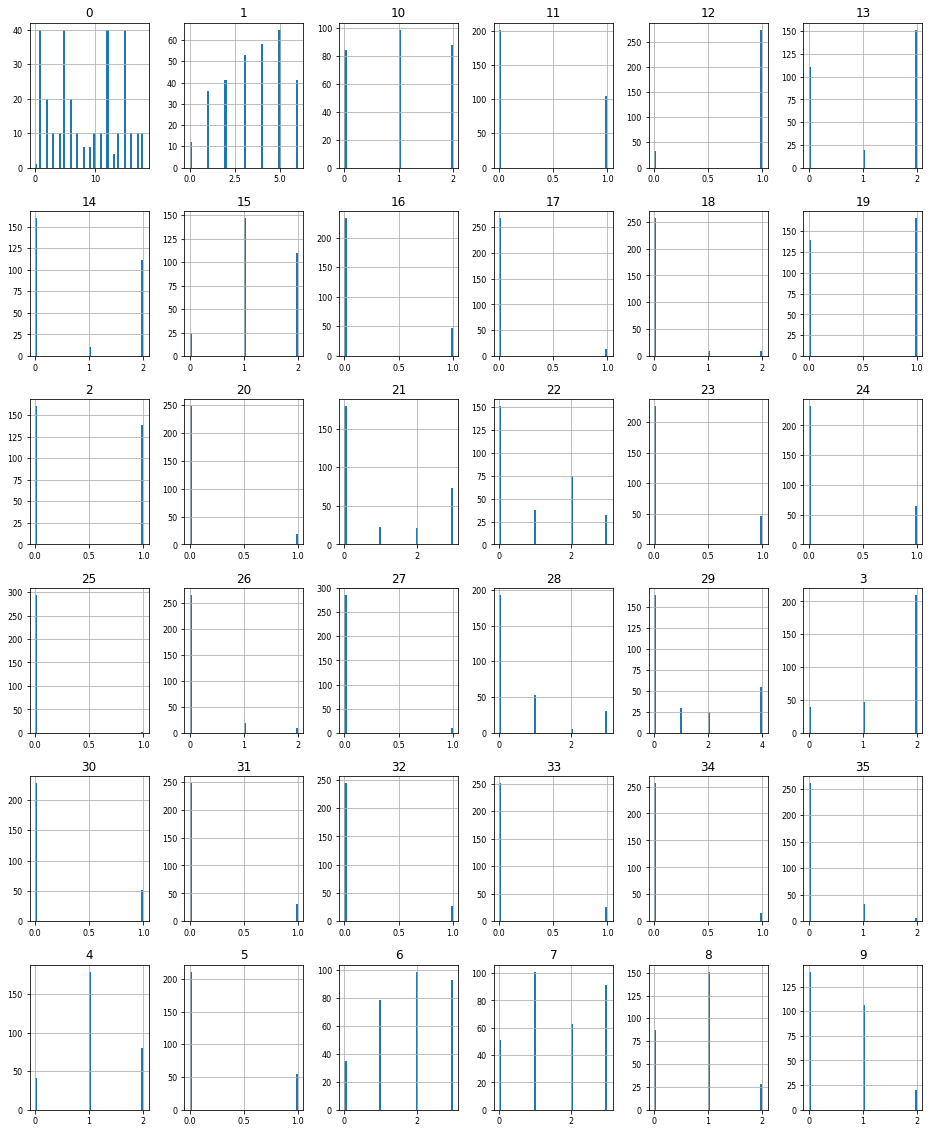

In [118]:
%matplotlib inline
soybean.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [77]:
class_one_hot = pd.get_dummies(soybean["0"], prefix="class")
class_one_hot.head()

,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9,class_10,class_11,class_12,class_13,class_14,class_15,class_16,class_17,class_18
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
soybean_one_hot = pd.concat([soybean, class_one_hot], axis=1)
soybean_one_hot.head()

,0,1,2,3,4,5,6,7,8,9,...,class_9,class_10,class_11,class_12,class_13,class_14,class_15,class_16,class_17,class_18
0,15,2.0,1.0,2.0,2.0,NaN,1.0,1.0,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1,15,1.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,12,5.0,1.0,2.0,1.0,0.0,3.0,3.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
3,15,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2.0,0.0,2.0,1.0,0.0,3.0,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
soybean_one_hot = soybean_one_hot.drop(["0"], axis=1)
soybean_one_hot.head()

,1,2,3,4,5,6,7,8,9,10,...,class_9,class_10,class_11,class_12,class_13,class_14,class_15,class_16,class_17,class_18
0,2.0,1.0,2.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1,1.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,5.0,1.0,2.0,1.0,0.0,3.0,3.0,0.0,1.0,2.0,...,0,0,0,1,0,0,0,0,0,0
3,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,0.0,2.0,1.0,0.0,3.0,3.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


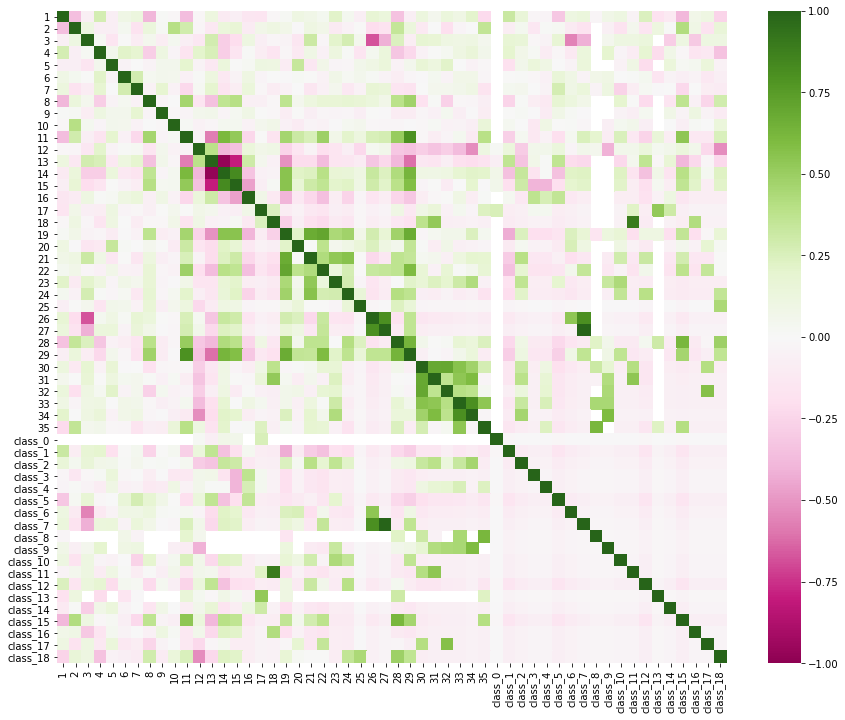

In [142]:
corr = soybean_one_hot.corr()

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax, vmin=-1, vmax=1, cmap="PiYG")

# Vehicle

In [81]:
vehicle = pd.read_csv("vehicle_shuffled.csv")
vehicle.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,88,38,58,137,60,5,148,46,19,131,163,319,157,86,12,0,180,183,saab
1,91,52,98,196,62,9,193,34,22,161,216,562,244,69,3,1,190,199,opel
2,89,48,85,189,64,8,169,39,20,153,188,427,190,64,16,5,195,201,saab
3,104,55,107,222,68,11,218,31,24,173,232,703,229,71,3,10,188,199,saab
4,91,39,83,170,60,8,172,38,21,134,197,445,152,72,0,10,188,194,saab


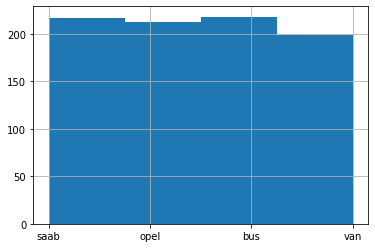

In [84]:
vehicle["Class"].hist(bins=4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002273BBF4D30>,
      dtype=object)

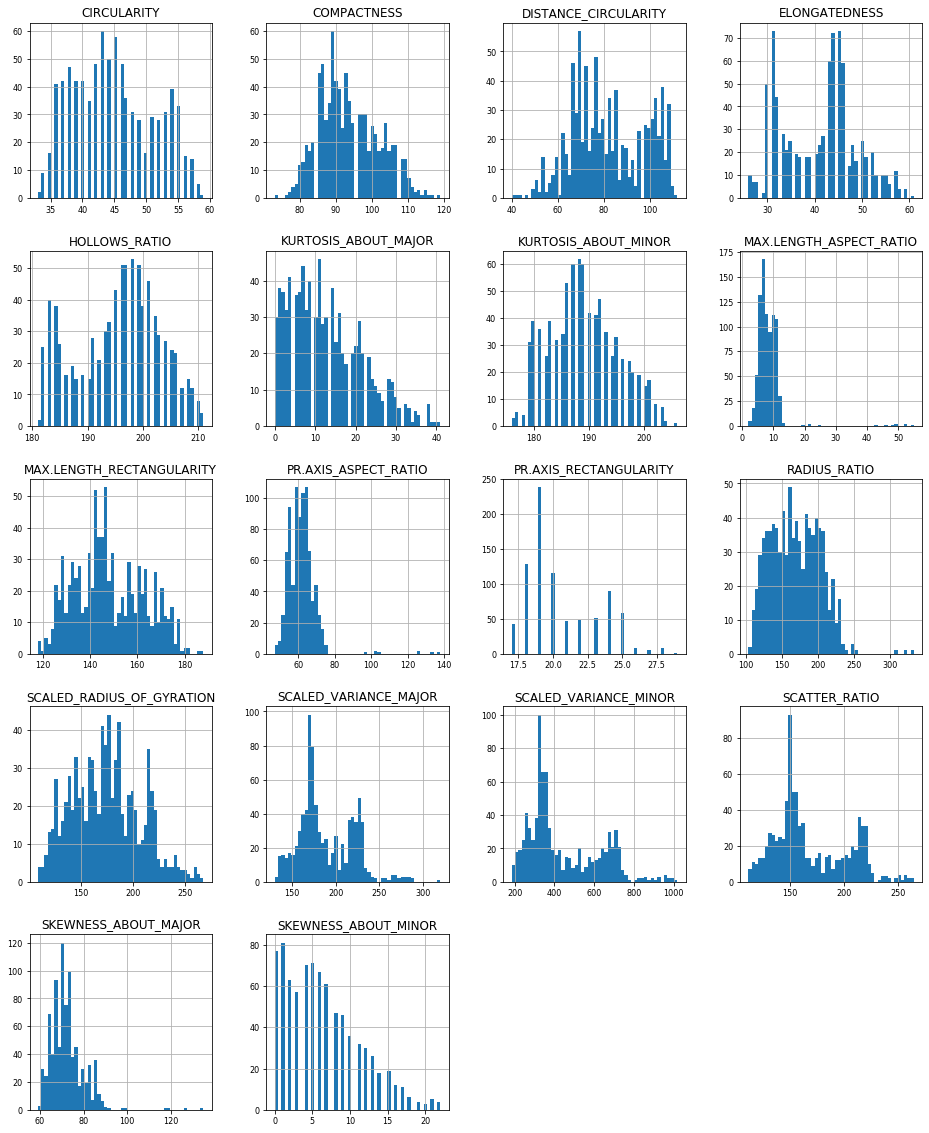

In [119]:
%matplotlib inline
vehicle.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [85]:
class_one_hot = pd.get_dummies(vehicle["Class"], prefix="class")
vehicle_one_hot = pd.concat([vehicle, class_one_hot], axis=1)
vehicle_one_hot.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,...,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class,class_bus,class_opel,class_saab,class_van
0,88,38,58,137,60,5,148,46,19,131,...,86,12,0,180,183,saab,0,0,1,0
1,91,52,98,196,62,9,193,34,22,161,...,69,3,1,190,199,opel,0,1,0,0
2,89,48,85,189,64,8,169,39,20,153,...,64,16,5,195,201,saab,0,0,1,0
3,104,55,107,222,68,11,218,31,24,173,...,71,3,10,188,199,saab,0,0,1,0
4,91,39,83,170,60,8,172,38,21,134,...,72,0,10,188,194,saab,0,0,1,0


In [86]:
vehicle_one_hot = vehicle_one_hot.drop(["Class"], axis=1)

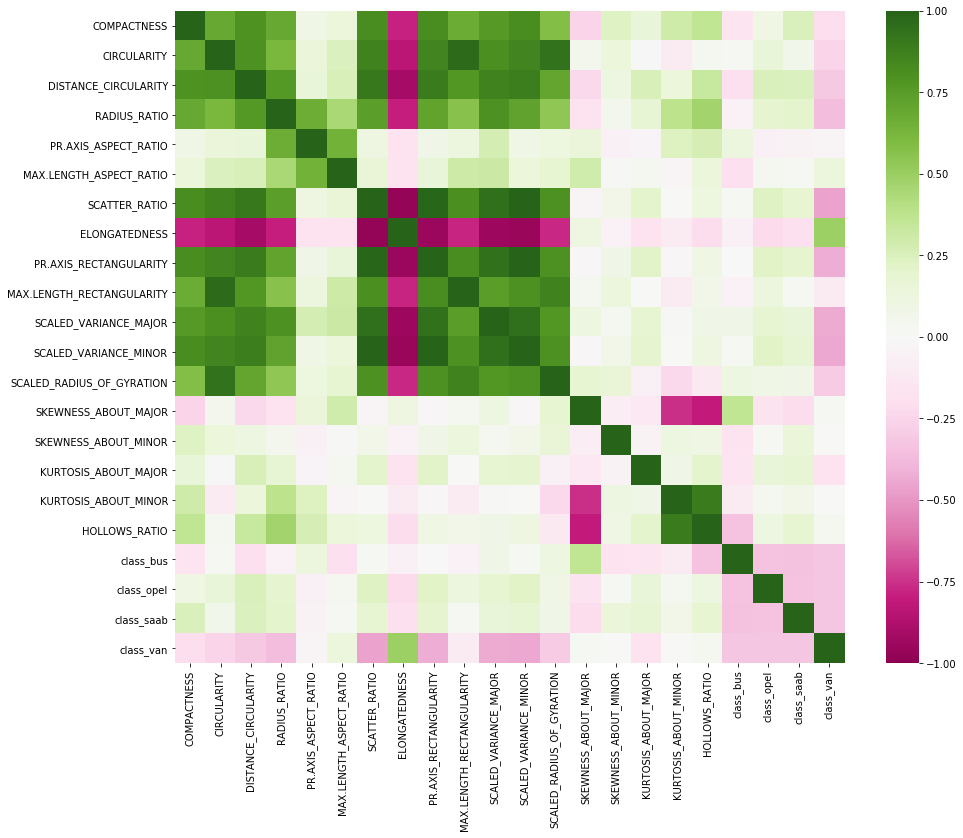

In [131]:
corr = vehicle_one_hot.corr()

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax, vmin=-1, vmax=1, cmap="PiYG")

# wdbc

In [88]:
wdbc = pd.read_csv("wdbc_shuffled.csv")
wdbc.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,863270,B,12.36,18.54,79.01,466.7,0.08477,0.06815,0.026430,0.01921,...,13.29,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,8810158,B,13.11,22.54,87.02,529.4,0.10020,0.14830,0.087050,0.05102,...,14.55,29.16,99.48,639.3,0.1349,0.44020,0.31620,0.11260,0.4128,0.10760
2,89143601,B,11.37,18.89,72.17,396.0,0.08713,0.05008,0.023990,0.02173,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994
3,88147101,B,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,...,11.52,19.80,73.47,395.4,0.1341,0.11530,0.02639,0.04464,0.2615,0.08269
4,862548,M,14.42,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.05839,...,16.33,30.86,109.50,826.4,0.1431,0.30260,0.31940,0.15650,0.2718,0.09353


In [89]:
wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [93]:
wdbc.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


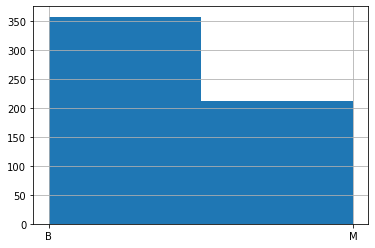

In [97]:
wdbc["1"].hist(bins=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002273E3ACB00>,
      dtype=object)

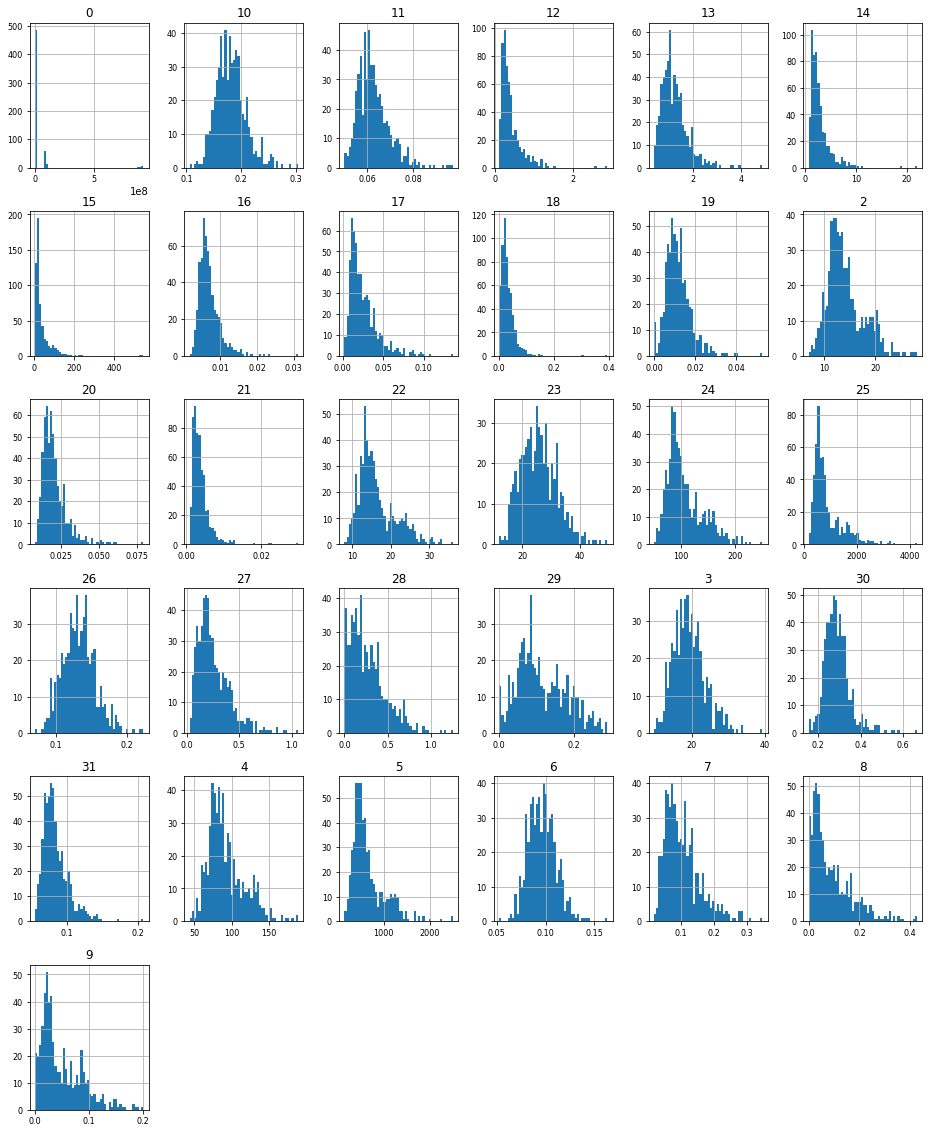

In [120]:
%matplotlib inline
wdbc.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [98]:
class_one_hot = pd.get_dummies(wdbc["1"], prefix="class")
wdbc_one_hot = pd.concat([wdbc, class_one_hot], axis=1)
wdbc_one_hot = wdbc_one_hot.drop(["1"], axis=1)
wdbc_one_hot.head()

,0,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,class_B,class_M
0,863270,12.36,18.54,79.01,466.7,0.08477,0.06815,0.026430,0.01921,0.1602,...,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185,1,0
1,8810158,13.11,22.54,87.02,529.4,0.10020,0.14830,0.087050,0.05102,0.1850,...,99.48,639.3,0.1349,0.44020,0.31620,0.11260,0.4128,0.10760,1,0
2,89143601,11.37,18.89,72.17,396.0,0.08713,0.05008,0.023990,0.02173,0.2013,...,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994,1,0
3,88147101,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,0.1788,...,73.47,395.4,0.1341,0.11530,0.02639,0.04464,0.2615,0.08269,1,0
4,862548,14.42,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.05839,0.1879,...,109.50,826.4,0.1431,0.30260,0.31940,0.15650,0.2718,0.09353,0,1


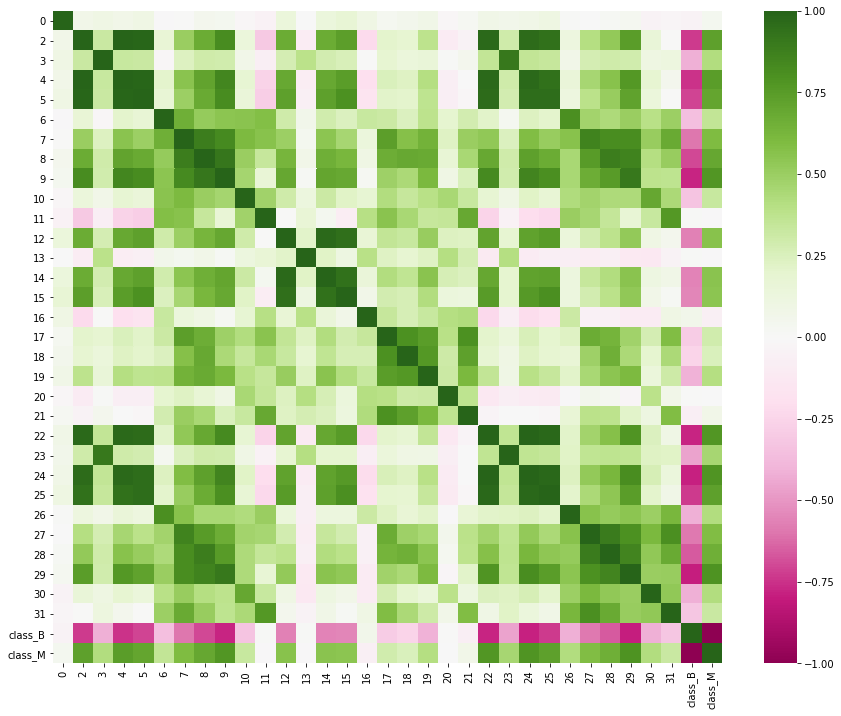

In [130]:
corr = wdbc_one_hot.corr()

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax, vmin=-1, vmax=1, cmap="PiYG")

# Winequality-red

In [100]:
winer = pd.read_csv("winer_shuffled.csv")
winer.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.660,0.00,3.0,0.115,21.0,31.0,0.99629,3.45,0.63,10.3,5
1,4.9,0.420,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7
2,7.0,0.685,0.00,1.9,0.067,40.0,63.0,0.99790,3.60,0.81,9.9,5
3,10.0,0.560,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,6
4,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5


In [101]:
winer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [102]:
winer.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


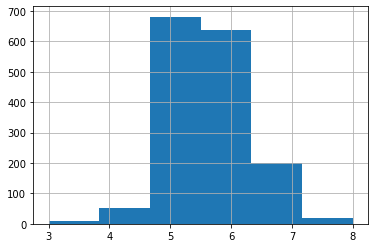

In [104]:
winer["quality"].hist(bins=6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022741E16828>,
      dtype=object)

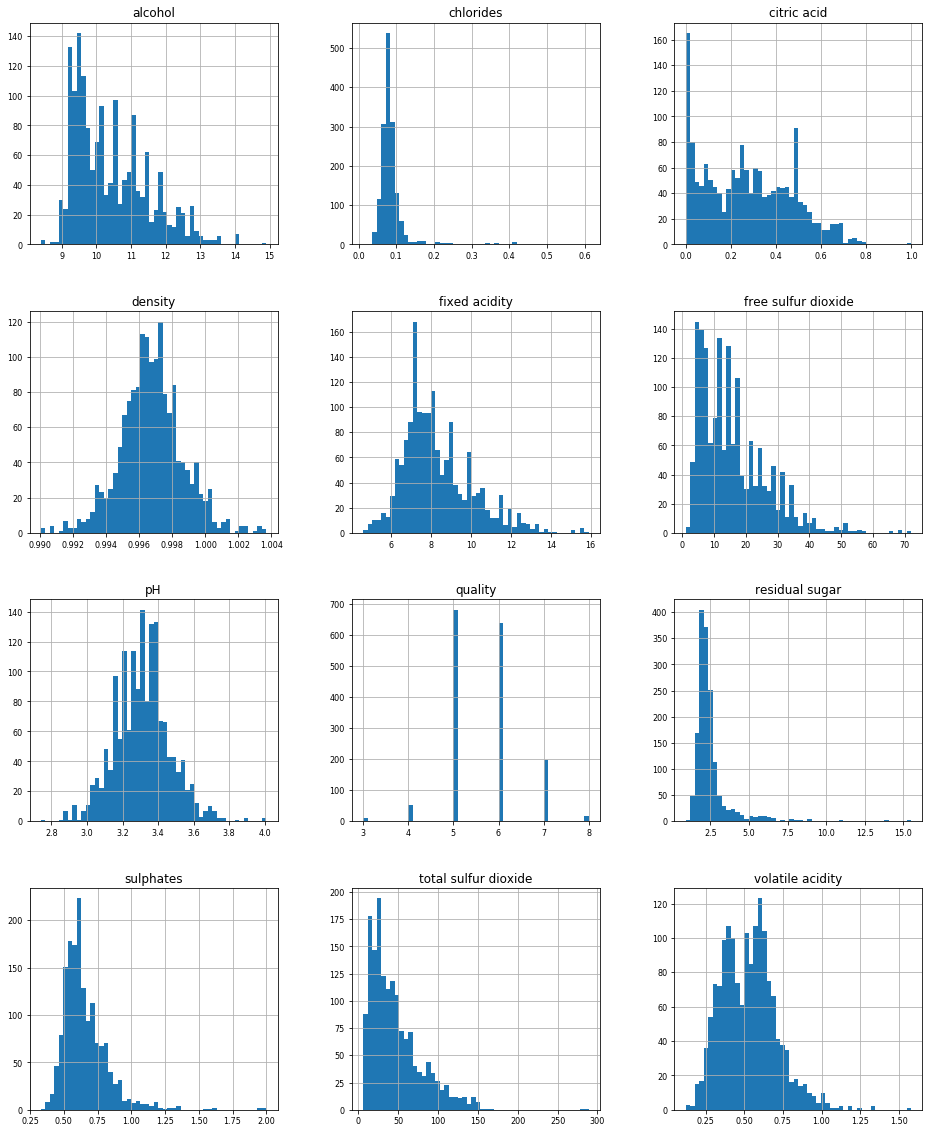

In [121]:
%matplotlib inline
winer.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [106]:
'''
class_one_hot = pd.get_dummies(wdbc["1"], prefix="class")
wdbc_one_hot = pd.concat([wdbc, class_one_hot], axis=1)
wdbc_one_hot = wdbc_one_hot.drop(["1"], axis=1)
wdbc_one_hot.head()
'''
class_one_hot = pd.get_dummies(winer["quality"], prefix="class")
winer_one_hot = pd.concat([winer, class_one_hot], axis=1)
winer_one_hot = winer_one_hot.drop(["quality"], axis=1)
winer_one_hot.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class_3,class_4,class_5,class_6,class_7,class_8
0,6.6,0.660,0.00,3.0,0.115,21.0,31.0,0.99629,3.45,0.63,10.3,0,0,1,0,0,0
1,4.9,0.420,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,0,0,0,0,1,0
2,7.0,0.685,0.00,1.9,0.067,40.0,63.0,0.99790,3.60,0.81,9.9,0,0,1,0,0,0
3,10.0,0.560,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,0,0,0,1,0,0
4,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,0,0,1,0,0,0


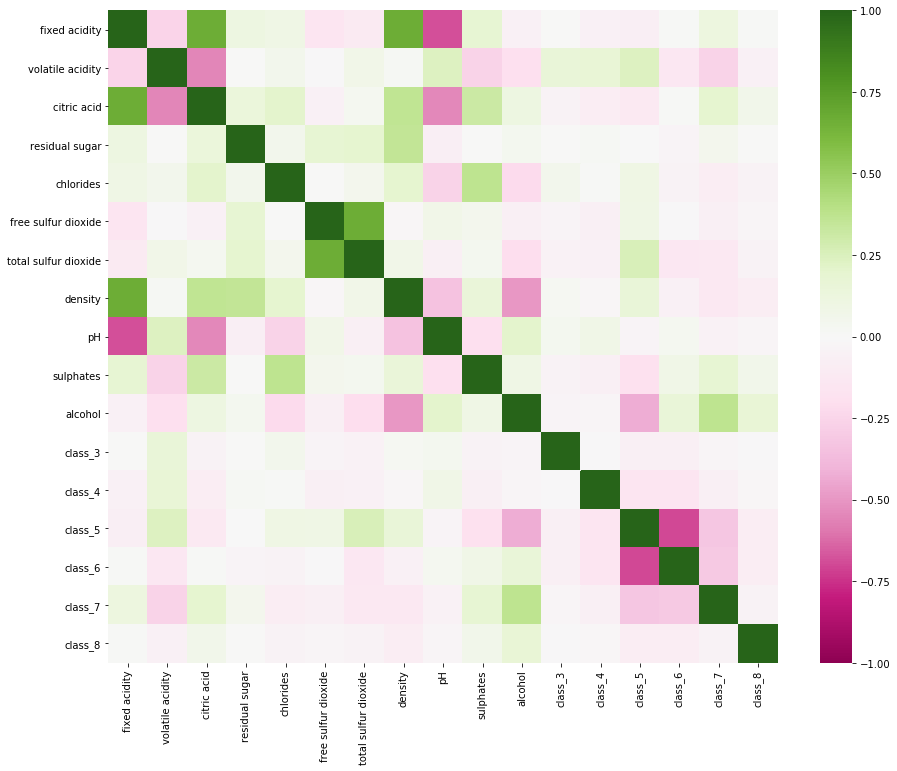

In [135]:
corr = winer_one_hot.corr()

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax, vmin=-1, vmax=1, cmap="PiYG")

# auto-mpg

In [119]:
auto_mpg = pd.read_csv("auto_mpg_pp.csv")
auto_mpg.head()

,0,1,2,3,4,5,6,7
0,17.0,8,305.0,130.0,3840.0,15.4,79,1
1,18.0,6,258.0,110.0,2962.0,13.5,71,1
2,24.0,4,121.0,110.0,2660.0,14.0,73,2
3,20.0,6,225.0,100.0,3651.0,17.7,76,1
4,26.0,4,97.0,46.0,1835.0,20.5,70,2


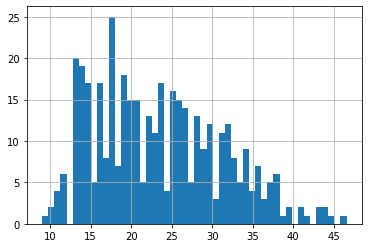

In [145]:
auto_mpg["0"].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022747B67CF8>,
      dtype=object)

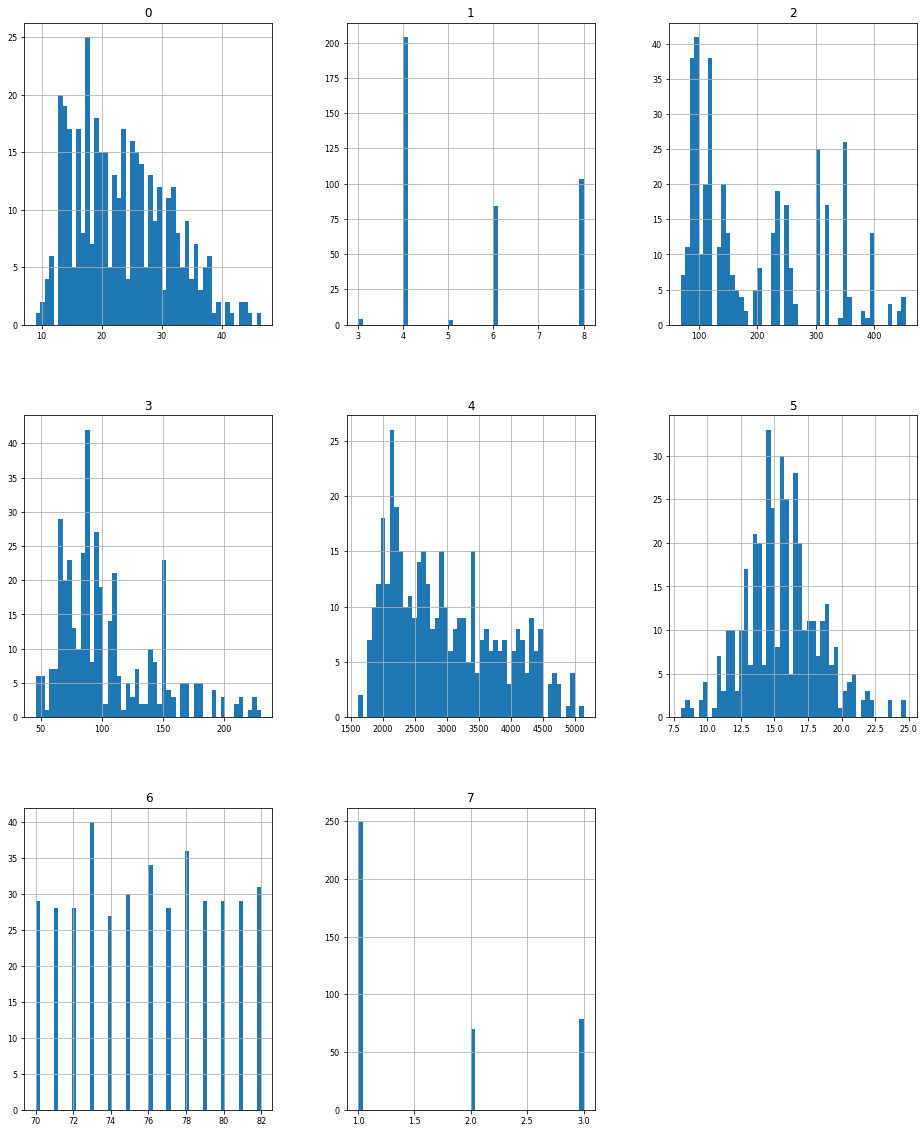

In [146]:
auto_mpg.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [120]:
auto_mpg_min = np.min(auto_mpg["0"])
auto_mpg_min

9.0

In [121]:
auto_mpg_max = np.max(auto_mpg["0"])
auto_mpg_max

46.6

In [122]:
step = (auto_mpg_max - auto_mpg_min) / 10
step

3.7600000000000002

In [123]:
bins = np.array([])

for x in range(0, 11):
    bins = np.append(bins, auto_mpg_min + (step*x))
    
bins

array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
       42.84, 46.6 ])

In [124]:
names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

auto_mpg["bins"] = pd.cut(auto_mpg["0"], bins, labels=names, include_lowest=True)
auto_mpg["bins"].head()

0    2
1    2
2    3
3    2
4    4
Name: bins, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [125]:
auto_mpg["bins"].unique()

[2, 3, 4, 1, 5, 7, 6, 0, 9, 8]
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [127]:
'''
bins_one_hot = pd.get_dummies(forestfires["bins"], prefix="bin")
forestfires_one_hot = pd.concat([forestfires, bins_one_hot], axis=1)
forestfires_one_hot = forestfires_one_hot.drop(["area", "bins"], axis=1)
forestfires_one_hot.head()
'''

bins_one_hot = pd.get_dummies(auto_mpg["bins"], prefix="bin")
auto_mpg_one_hot = pd.concat([auto_mpg, bins_one_hot], axis=1)
auto_mpg_one_hot = auto_mpg_one_hot.drop(["0", "bins"], axis=1)
auto_mpg_one_hot.head()

,1,2,3,4,5,6,7,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9
0,8,305.0,130.0,3840.0,15.4,79,1,0,0,1,0,0,0,0,0,0,0
1,6,258.0,110.0,2962.0,13.5,71,1,0,0,1,0,0,0,0,0,0,0
2,4,121.0,110.0,2660.0,14.0,73,2,0,0,0,1,0,0,0,0,0,0
3,6,225.0,100.0,3651.0,17.7,76,1,0,0,1,0,0,0,0,0,0,0
4,4,97.0,46.0,1835.0,20.5,70,2,0,0,0,0,1,0,0,0,0,0


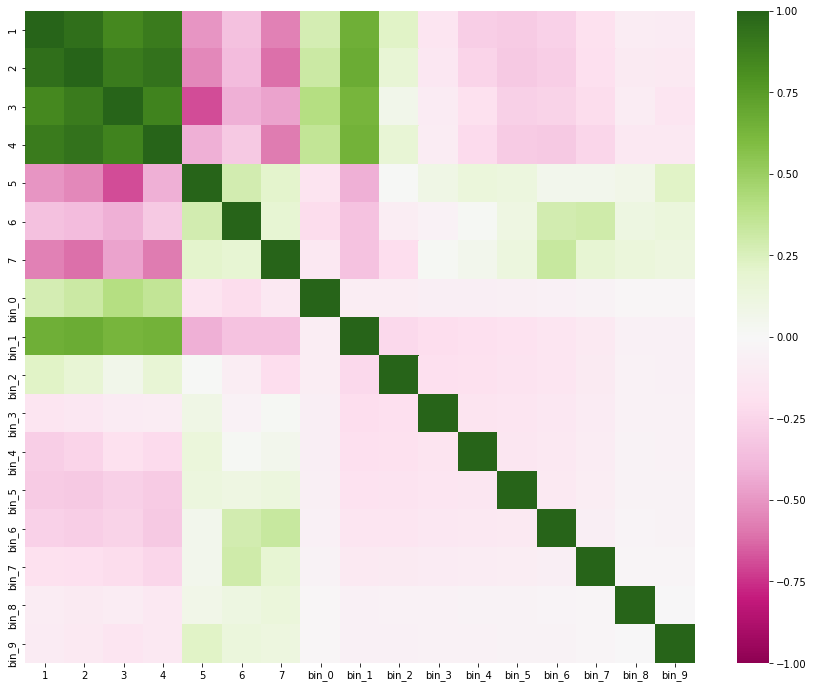

In [128]:
corr = auto_mpg_one_hot.corr()

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax, vmin=-1, vmax=1, cmap="PiYG")

# forestfires

In [32]:
forestfires = pd.read_csv("forestfires_pp.csv")
forestfires.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,4,4,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,...,0,0,0,0,1,0,0,0,0,0
1,8,6,92.2,81.8,480.8,11.9,16.4,43,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,1,0,0,0,0,0
3,2,2,91.1,103.2,638.8,5.8,23.1,31,3.1,0.0,...,0,0,0,0,1,0,0,0,0,0
4,4,3,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,...,0,0,1,0,0,1,0,0,0,0


In [149]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          517 non-null    int64  
 1   Y          517 non-null    int64  
 2   FFMC       517 non-null    float64
 3   DMC        517 non-null    float64
 4   DC         517 non-null    float64
 5   ISI        517 non-null    float64
 6   temp       517 non-null    float64
 7   RH         517 non-null    int64  
 8   wind       517 non-null    float64
 9   rain       517 non-null    float64
 10  area       517 non-null    float64
 11  month_apr  517 non-null    int64  
 12  month_aug  517 non-null    int64  
 13  month_dec  517 non-null    int64  
 14  month_feb  517 non-null    int64  
 15  month_jan  517 non-null    int64  
 16  month_jul  517 non-null    int64  
 17  month_jun  517 non-null    int64  
 18  month_mar  517 non-null    int64  
 19  month_may  517 non-null    int64  
 20  month_nov 

In [150]:
forestfires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.001934,0.029014,0.332689,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.043980,0.168007,0.471632,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


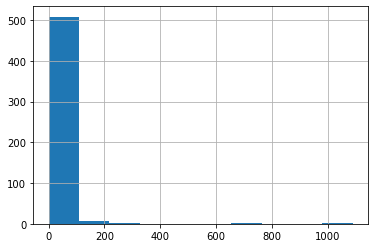

In [151]:
forestfires["area"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227489B9AC8>,
      dtype=object)

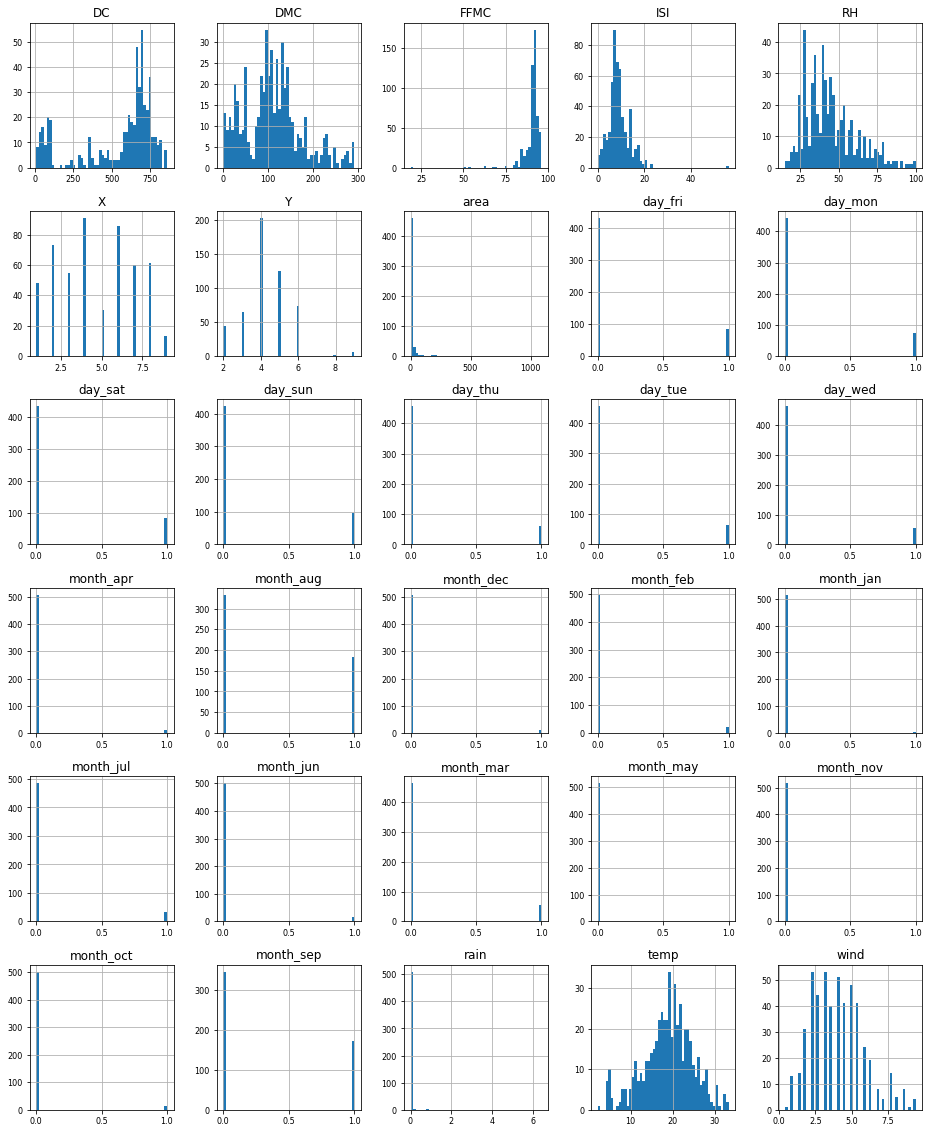

In [152]:
forestfires.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [110]:
forestfires_min = np.min(forestfires["area"])
forestfires_min

0.0

In [111]:
forestfires_max = np.max(forestfires["area"])
forestfires_max

1090.84

In [112]:
step = (forestfires_max - forestfires_min) / 10
step

109.08399999999999

In [113]:
bins = np.array([])

for x in range(0, 11):
    bins = np.append(bins, forestfires_min + (step*x))
    
bins

array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
        654.504,  763.588,  872.672,  981.756, 1090.84 ])

In [114]:
names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

forestfires["bins"] = pd.cut(forestfires["area"], bins, labels=names, include_lowest=True)
forestfires["bins"].head()

0    0
1    0
2    0
3    0
4    0
Name: bins, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [115]:
forestfires["bins"].unique()

[0, 1, 6, 2, 9]
Categories (5, int64): [0 < 1 < 2 < 6 < 9]

In [116]:
forestfires["area"].head()

0     9.77
1    71.30
2     0.00
3     0.00
4     3.33
Name: area, dtype: float64

In [117]:


bins_one_hot = pd.get_dummies(forestfires["bins"], prefix="bin")
forestfires_one_hot = pd.concat([forestfires, bins_one_hot], axis=1)
forestfires_one_hot = forestfires_one_hot.drop(["area", "bins"], axis=1)
forestfires_one_hot.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9
0,4,4,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,...,1,0,0,0,0,0,0,0,0,0
1,8,6,92.2,81.8,480.8,11.9,16.4,43,4.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,1,0,0,0,0,0,0,0,0,0
3,2,2,91.1,103.2,638.8,5.8,23.1,31,3.1,0.0,...,1,0,0,0,0,0,0,0,0,0
4,4,3,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,...,1,0,0,0,0,0,0,0,0,0


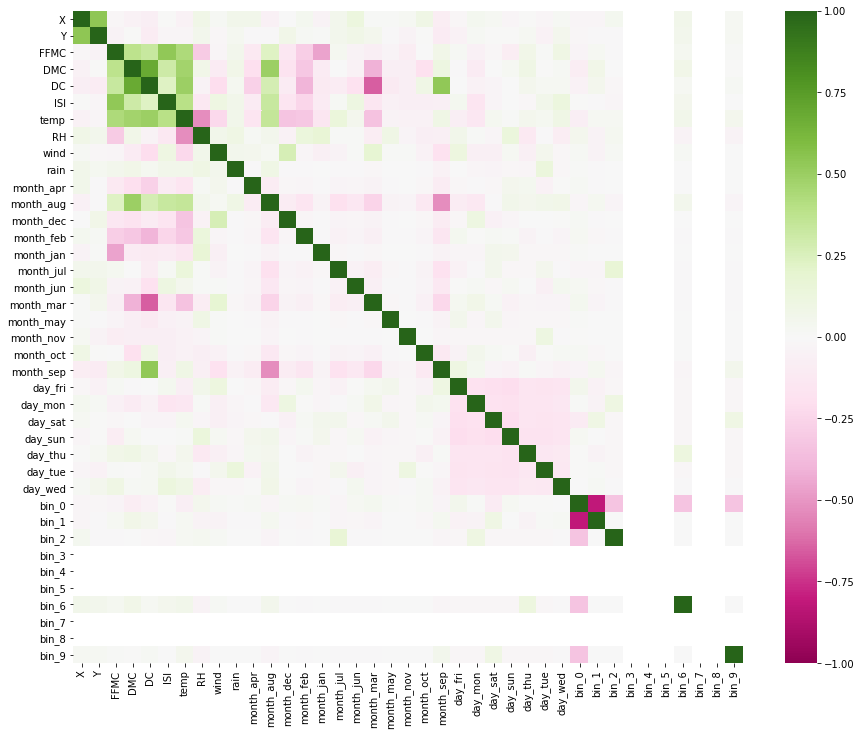

In [118]:
corr = forestfires_one_hot.corr()

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax, vmin=-1, vmax=1, cmap="PiYG")

# Housing

In [4]:
housing = pd.read_csv("housing_shuffled.csv")
housing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [155]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [156]:
housing.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


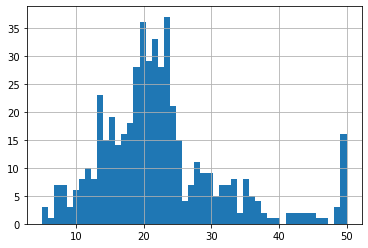

In [158]:
housing["13"].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002274B93E9B0>,
      dtype=object)

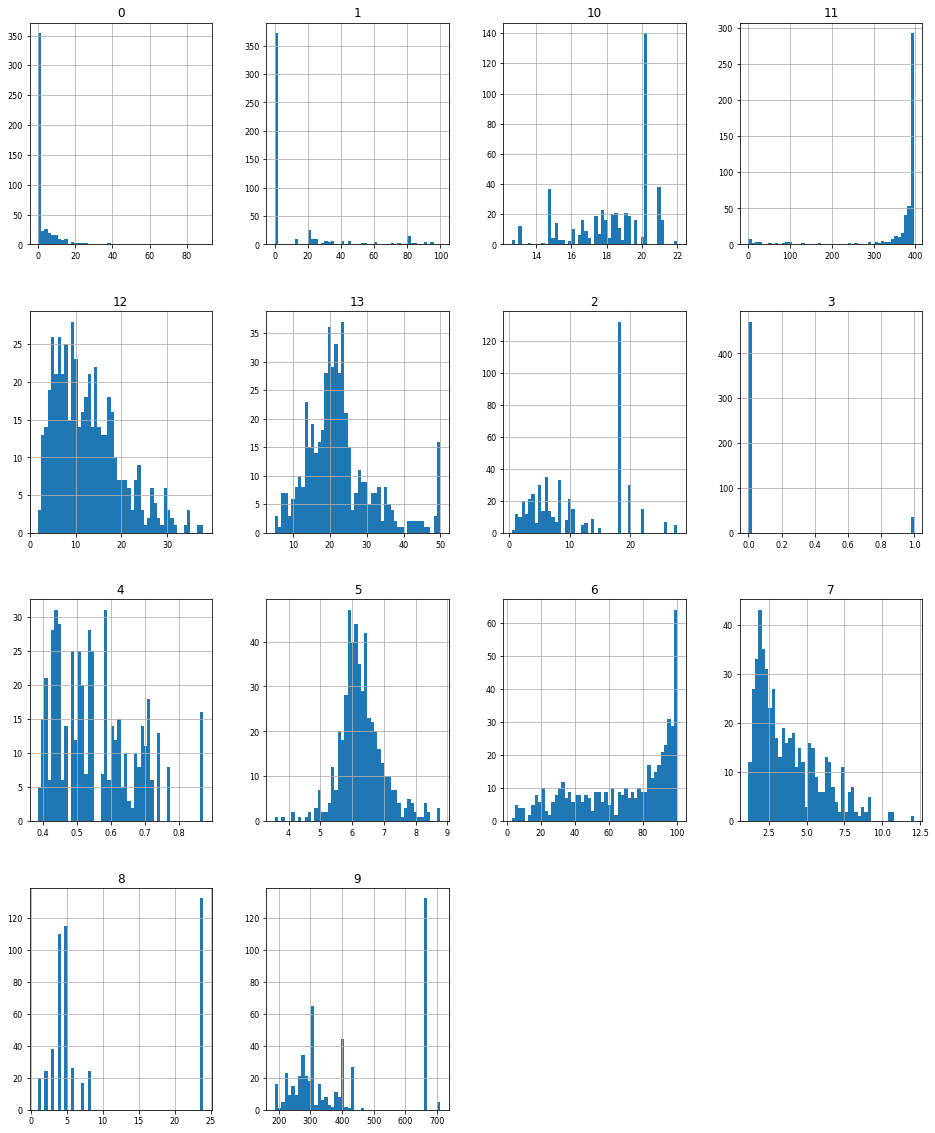

In [159]:
housing.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [103]:
housing_min = np.min(housing["13"])
housing_min

5.0

In [104]:
housing_max = np.max(housing["13"])
housing_max

50.0

In [105]:
step = (housing_max - housing_min)/10
step

4.5

In [106]:
bins = np.array([])

for x in range (0,11):
    bins = np.append(bins, housing_min + (step*x))
    
bins

array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ])

In [107]:
'''
names = ["0","1", "2", "3", "4", "5", "6", "7", "8", "9"]

d = dict(enumerate(names, 1))

housing["class"] = np.vectorize(d.get)(np.digitize(housing["13"], bins))
housing["class"].head()
'''

'\nnames = ["0","1", "2", "3", "4", "5", "6", "7", "8", "9"]\n\nd = dict(enumerate(names, 1))\n\nhousing["class"] = np.vectorize(d.get)(np.digitize(housing["13"], bins))\nhousing["class"].head()\n'

In [108]:
names = [0,1, 2, 3, 4, 5, 6, 7, 8, 9]

housing["class"] = pd.cut(housing["13"], bins, labels=names, include_lowest=True)
housing["class"].head()

0    4
1    3
2    6
3    6
4    6
Name: class, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [109]:

class_one_hot = pd.get_dummies(housing["class"], prefix="bin")
housing_one_hot = pd.concat([housing, class_one_hot], axis=1)
housing_one_hot = housing_one_hot.drop(["13", "class"], axis=1)
housing_one_hot.head()

,0,1,2,3,4,5,6,7,8,9,...,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,...,0,0,0,0,1,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,...,0,0,0,1,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,0,0,0,0,0,0,1,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,...,0,0,0,0,0,0,1,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,...,0,0,0,0,0,0,1,0,0,0


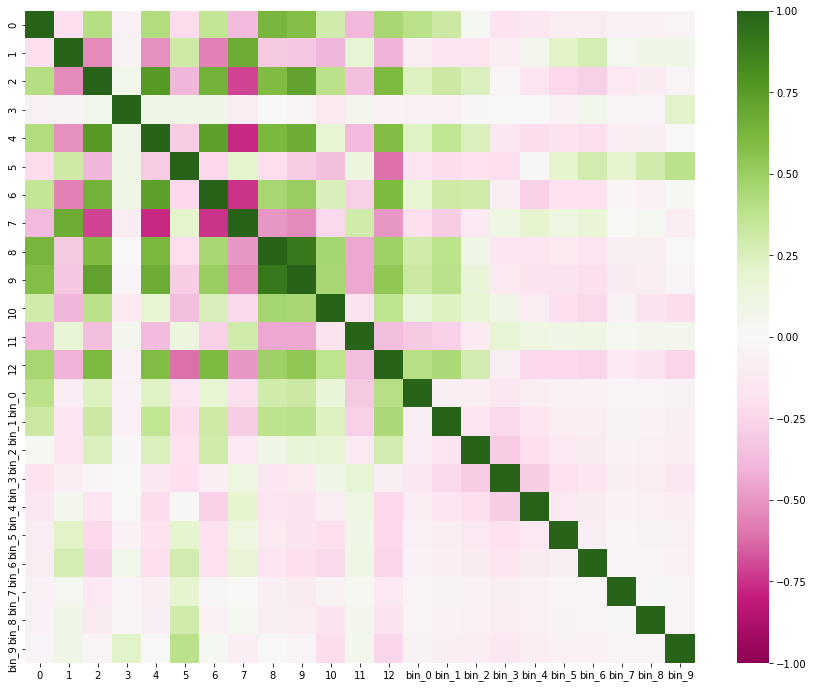

In [59]:
corr = housing_one_hot.corr()

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax, vmin=-1, vmax=1, cmap="PiYG")